In [147]:
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
classes   = [(2,2),(-2,-2),(2,-2),(-2,2)]
num_cols  = len(classes[0])
col_names = ["x_"+str(i) for i in range(num_cols)] 
dfs = []
for i in range(len(classes)):
    data = np.random.randn(10, num_cols)*0.9
    data[:,0] = data[:,0] + classes[i][0]
    data[:,1] = data[:,1] + classes[i][1]
    df = pd.DataFrame(data,columns = col_names)
    df["label"] = i + 1
    dfs.append(df)
data = pd.concat(dfs)

In [156]:
def getPoints(k):
    d_points = pd.DataFrame(columns=["x_0","x_1","label"])
    for i in range(1,len(classes)+1):
        d_points=d_points.append(data[data.label == i].iloc[0:k][["x_0","x_1","label"]])
    return d_points

In [157]:
def euclid(p1,p2): 
    return sum([(p1[i]-p2[i])**2 for i in range(len(p1))])

In [158]:
def knn(k):
    d_points = getPoints(k)
    pred = []
    for row in data[["x_0","x_1"]].values:
        dist = []
        
        
        
        
        
        for index, r in d_points.iterrows():
            dist.append([euclid(row,r[["x_0","x_1"]].values),r["label"]])
        dist.sort(key = lambda x: x[0])
        v=[]
        for i in range(len(classes)+1):
            v.append(0)
        for d in dist:
            if (v[d[1]]==k-1):
                pred.append(d[1])
                break
            v[d[1]]=v[d[1]]+1
    return(pred)

In [159]:
data["predicted"]=knn(3)

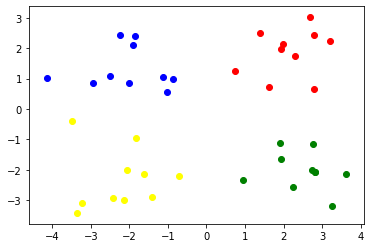

In [160]:
colors = ["red","yellow","green","blue"]
for i in range(len(colors)):
    vals = data[data.label == (i + 1)][col_names].values
    plt.scatter(vals[:,0],vals[:,1],color =colors[i])
plt.show()

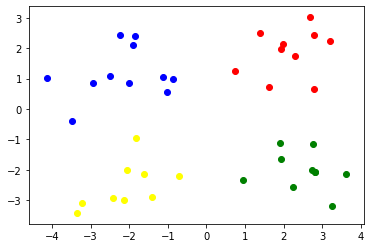

In [161]:
for i in range(len(colors)):
    vals = data[data.predicted == (i + 1)][col_names].values
    plt.scatter(vals[:,0],vals[:,1],color =colors[i])
plt.show()

In [211]:
def cluster(k):
    feat=data[['x_0', 'x_1']].values.tolist()
    centroids=getPoints(1)[['x_0', 'x_1']].values.tolist()
    closest=[0]*len(feat)
    while True:
        old_closest=closest.copy()
        for i in range(len(feat)):
            minim=9000000
            minii=-1
            for j in range(k):
                dis=euclid(feat[i],centroids[j])
                if (dis<minim):
                    minim=dis
                    minii=j
            closest[i]=minii
        print(centroids)
        if (closest==old_closest):
            break
        centroids=[[0]*2 for i in range(k)]
        n=[0]*k
        for i in range(len(feat)):
            n[closest[i]]=n[closest[i]]+1
            for j in range(2):
                centroids[closest[i]][j]=centroids[closest[i]][j]+feat[i][j]
        for i in range(k):
            for j in range(2):
                centroids[i][j]=centroids[i][j]/n[i]
    print(closest)
    his=[0]*k
    for c in closest:
        his[c]=his[c]+1
    return his        

In [212]:
cluster(4)

[[1.9731368996238567, 2.1217100845715984], [-1.4193134494896644, -2.8826589195304395], [0.9465783502933747, -2.344349959735948], [-1.9104554256969992, 2.0879265997312086]]
[[2.141993885226742, 1.8691818961823057], [-2.0897344828552797, -2.5204266978463377], [2.5009826766170966, -2.033321983295545], [-2.187813400551343, 1.174953532328707]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


[10, 9, 10, 11]

yes
